# BASICS OF PYTHON | SESSION 5

---


Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [37]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/MyDrive/Python/spotify song attributes data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2.&nbsp;Data Cleaning (overview)

In [27]:
print(data)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0       0.01020         0.833       204600   0.434   
1              1       0.19900         0.743       326933   0.359   
2              2       0.03440         0.838       185707   0.412   
3              3       0.60400         0.494       199413   0.338   
4              4       0.18000         0.678       392893   0.561   
...          ...           ...           ...          ...     ...   
2012        2012       0.00106         0.584       274404   0.932   
2013        2013       0.08770         0.894       182182   0.892   
2014        2014       0.00857         0.637       207200   0.935   
2015        2015       0.00164         0.557       185600   0.992   
2016        2016       0.00281         0.446       204520   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1            

In [20]:
print(data.columns)

Index(['Unnamed: 0', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')


In [17]:
data.head()            # preview data
data.info()            # data types and nulls
data.size              # total number of elements
data.shape             # (rows, columns)
data.isnull().sum()    # count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


,0
Unnamed: 0,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0
key,0
liveness,0
loudness,0
mode,0


# 3.&nbsp;Data Cleaning (interpretability)

In [38]:
# Convert and round the 'duration_ms' column to minutes and rename it

data['duration_ms'] = round(data['duration_ms'] / (1000 * 60), 2)
data = data.rename(columns={'duration_ms': 'duration-min'})

print(data)


      Unnamed: 0  acousticness  danceability  duration-min  energy  \
0              0       0.01020         0.833          3.41   0.434   
1              1       0.19900         0.743          5.45   0.359   
2              2       0.03440         0.838          3.10   0.412   
3              3       0.60400         0.494          3.32   0.338   
4              4       0.18000         0.678          6.55   0.561   
...          ...           ...           ...           ...     ...   
2012        2012       0.00106         0.584          4.57   0.932   
2013        2013       0.08770         0.894          3.04   0.892   
2014        2014       0.00857         0.637          3.45   0.935   
2015        2015       0.00164         0.557          3.09   0.992   
2016        2016       0.00281         0.446          3.41   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0             0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1

In [43]:
# rounding acousticness, instrumentalness, speechiness, liveness, loudness

data['acousticness'] = (data['acousticness']).round(3)
data['instrumentalness'] = (data['instrumentalness']).round(3)
data['speechiness'] = (data['speechiness']).round(3)
data['liveness'] = (data['liveness']).round(3)
data['loudness'] = np.round(data['loudness'], decimals=2)

print(data)

      Unnamed: 0  acousticness  danceability  duration-min  energy  \
0              0         0.010         0.833          3.41   0.434   
1              1         0.199         0.743          5.45   0.359   
2              2         0.034         0.838          3.10   0.412   
3              3         0.604         0.494          3.32   0.338   
4              4         0.180         0.678          6.55   0.561   
...          ...           ...           ...           ...     ...   
2012        2012         0.001         0.584          4.57   0.932   
2013        2013         0.088         0.894          3.04   0.892   
2014        2014         0.009         0.637          3.45   0.935   
2015        2015         0.002         0.557          3.09   0.992   
2016        2016         0.003         0.446          3.41   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0                0.022    2     0.165     -8.80     1        0.431  150.062   
1

# 4.&nbsp;Data Cleaning (reduction)

In [44]:
# Removeing the time_signature from data

data = data.drop('time_signature', axis=1)
print(data)

      Unnamed: 0  acousticness  danceability  duration-min  energy  \
0              0         0.010         0.833          3.41   0.434   
1              1         0.199         0.743          5.45   0.359   
2              2         0.034         0.838          3.10   0.412   
3              3         0.604         0.494          3.32   0.338   
4              4         0.180         0.678          6.55   0.561   
...          ...           ...           ...           ...     ...   
2012        2012         0.001         0.584          4.57   0.932   
2013        2013         0.088         0.894          3.04   0.892   
2014        2014         0.009         0.637          3.45   0.935   
2015        2015         0.002         0.557          3.09   0.992   
2016        2016         0.003         0.446          3.41   0.915   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0                0.022    2     0.165     -8.80     1        0.431  150.062   
1

# 5.&nbsp;Data Cleaning (noisy data)

In [45]:
# Removeing the songs with zero instrumentalness and without enough liveness

data = data.drop(data[(data['instrumentalness'] == 0) & (data['liveness'] < 0.5)].index)
print(data)


      Unnamed: 0  acousticness  danceability  duration-min  energy  \
0              0         0.010         0.833          3.41   0.434   
1              1         0.199         0.743          5.45   0.359   
3              3         0.604         0.494          3.32   0.338   
4              4         0.180         0.678          6.55   0.561   
7              7         0.020         0.266          5.83   0.348   
...          ...           ...           ...           ...     ...   
2011        2011         0.001         0.528          4.08   0.879   
2012        2012         0.001         0.584          4.57   0.932   
2013        2013         0.088         0.894          3.04   0.892   
2014        2014         0.009         0.637          3.45   0.935   
2015        2015         0.002         0.557          3.09   0.992   

      instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0                0.022    2     0.165     -8.80     1        0.431  150.062   
1

# 6.&nbsp;Data Cleaning (completeness)

In [47]:
# chacking nan values
data.isna().any().any()

np.False_

# 7.&nbsp;Data Exploring


In [49]:
# selecting the rows with mode 1, duration-min more than 4, and danceability more than 0.4

selected_data = data[(data['mode'] == 1) & (data['duration-min'] > 4) & (data['danceability'] > 0.4)]
selected_data.shape

(237, 16)

In [54]:
# sorting the data by liveness with value more than 0.2 in descending order

sorted_data = data[data['liveness'] > 0.2].sort_values(by='liveness', ascending=False)
sorted_data.shape

(338, 16)

In [62]:
# which song_title has highest tempo and which song has highest liveness

max_tempo_song = data[data['tempo'] == data['tempo'].max()]
max_liveness_song = data[data['liveness'] == data['liveness'].max()]
print(f'highest tempo:', max_tempo_song['song_title'])
print(f'highest liveness:',max_liveness_song['song_title'])

highest tempo: 412    Lazuli
Name: song_title, dtype: object
highest liveness: 783    dance yrself clean - live at madison square ga...
Name: song_title, dtype: object


# 8.&nbsp;Data Analysis

In [67]:
# Correlated attributes

correlated_data = data.select_dtypes(include=['number']).corr()
print(correlated_data)

                  Unnamed: 0  acousticness  danceability  duration-min  \
Unnamed: 0          1.000000      0.219697     -0.177890     -0.064569   
acousticness        0.219697      1.000000     -0.266090      0.136518   
danceability       -0.177890     -0.266090      1.000000      0.060789   
duration-min       -0.064569      0.136518      0.060789      1.000000   
energy             -0.112489     -0.725804      0.136501     -0.190619   
instrumentalness    0.007368      0.194783     -0.110932      0.210217   
key                -0.029812     -0.106239      0.063519      0.027327   
liveness            0.026216     -0.140980     -0.131008     -0.057685   
loudness           -0.112968     -0.680798      0.182549     -0.262051   
mode                0.025994      0.068572     -0.069047     -0.056024   
speechiness        -0.057549     -0.174780      0.098806     -0.085400   
tempo              -0.060765     -0.196250     -0.127862     -0.151219   
valence            -0.238945     -0.25

In [69]:
# Are the liveness is significantly different between targets 0 and 1

import scipy.stats as stats
liveness_0= data[data['target'] == 0]['liveness']
liveness_1= data[data['target'] == 1]['liveness']

print(np.var(liveness_0), "\t", np.var(liveness_1))

def get_ttest(x, y):
  result = stats.ttest_ind(a=x, b=y, equal_var=True)
  return result

get_ttest(liveness_0, liveness_1)

0.042475610981443576 	 0.036249763214935365


TtestResult(statistic=np.float64(2.4015437796286387), pvalue=np.float64(0.016522255336009626), df=np.float64(926.0))

In [73]:
# Are the tempos significantly different between energies less than .4 and more than 0.6?

tempo_low_energy = data[data['energy'] < 0.4]['tempo']
tempo_high_energy = data[data['energy'] > 0.6]['tempo']

print(np.var(tempo_low_energy), np.var(tempo_high_energy))
get_ttest(tempo_low_energy,tempo_high_energy)

1008.7104446185355 571.1601517370525


TtestResult(statistic=np.float64(-5.78100386962915), pvalue=np.float64(1.0865529299468594e-08), df=np.float64(755.0))

In [74]:
# Is there a significant difference in acousticness among songs with keys in the ranges 0–3, 4–7, and 8–11?

key_0_3 = data[(data['key'] >= 0) & (data['key'] <= 3)]['acousticness']
key_4_7 = data[(data['key'] >= 4) & (data['key'] <= 7)]['acousticness']
key_8_11 = data[(data['key'] >= 8) & (data['key'] <= 11)]['acousticness']

def get_anova_test(*groups):
  result = stats.f_oneway(*groups)
  return result

anova_result = get_anova_test(key_0_3, key_4_7, key_8_11)
print(f"F-statistic: {anova_result.statistic}")
print(f"P-value: {anova_result.pvalue}")


F-statistic: 5.898427401529825
P-value: 0.002848018501581414


# 9.&nbsp;Data Visualization

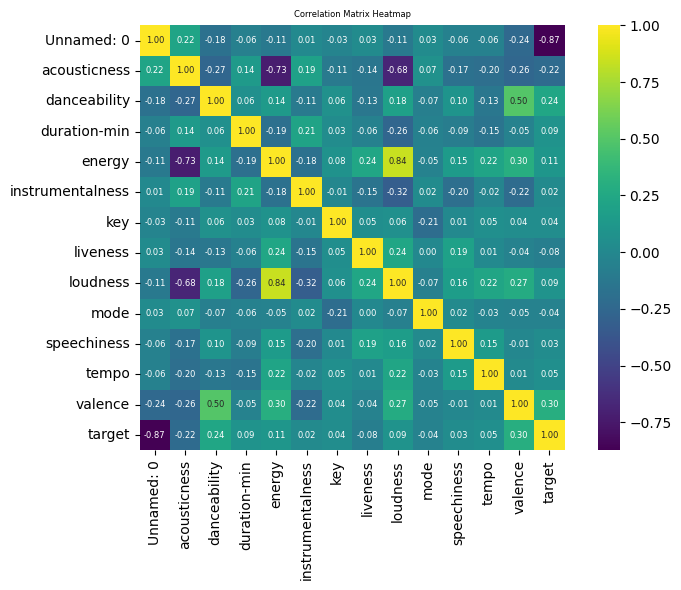

<Figure size 640x480 with 0 Axes>

In [91]:
#Correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlated_data, annot=True, cmap='viridis', fmt=".2f", square=True,
            annot_kws={"size": 6})

plt.title('Correlation Matrix Heatmap', fontsize=6)
plt.tight_layout()
plt.show()
fig_heatmap = plt.figure()


<ipython-input-93-d70a58e723a0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key_group', y='acousticness', data=acousticness_data, palette='pastel')


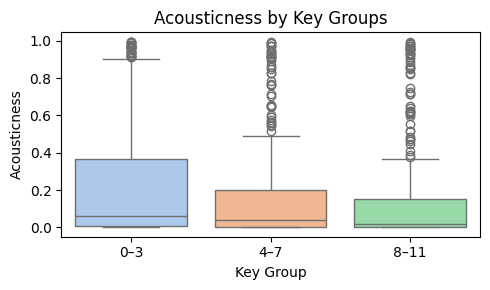

<Figure size 640x480 with 0 Axes>

In [93]:
# ploting acousticness among songs with keys in the ranges 0–3, 4–7, and 8–11, in box plot
# Create a DataFrame for plotting
acousticness_data = pd.DataFrame({
    'acousticness': pd.concat([key_0_3, key_4_7, key_8_11], ignore_index=True),
    'key_group': (
        ['0–3'] * len(key_0_3) +
        ['4–7'] * len(key_4_7) +
        ['8–11'] * len(key_8_11)
    )
})
# Create the boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(x='key_group', y='acousticness', data=acousticness_data, palette='pastel')

plt.title('Acousticness by Key Groups')
plt.xlabel('Key Group')
plt.ylabel('Acousticness')
plt.tight_layout()
plt.show()
fig_boxplot = plt.figure()

# 10.&nbsp;Data Exporting

In [94]:
fig_heatmap.savefig('fig_heatmap.svg', dpi=300, bbox_inches='tight')
fig_boxplot.savefig('fig_boxplot.svg', dpi=300, bbox_inches='tight')
data.to_csv('Spotify_test_data.csv', header=True, index=True)
